In [1]:
# Import public packages and functions
import os
import pandas as pd
import numpy as np
import sys
import json
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp

import warnings
warnings.filterwarnings("ignore")

# inserting the lib folder to the compiler
sys.path.insert(0, './lib')
sys.path.insert(0, './utils/')

import utils_plotting_psd, utils_plotting, utils_psd

from lib_data import DATA_IO
from lib_statistics import NON_PARAMETRIC_TEST, PARAMETRIC_TEST

C:\Users\a.kaymak\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
PATH_CURR = os.path.abspath(os.curdir)    # current code
PATH      = (str(Path(PATH_CURR).parent)) # data repository: upper directory where datasets situated

In [3]:
features  = ['patient', 'event_no', 'event_category', 'event_laterality','event_start_time', 'duration','LFP_hemisphere', 
             'LFP_channel', 'pre_event_psd', 'event_psd', 'post_event_psd', 'dyskinesia_arm','dyskinesia_total']

# 1. DATA IO

In [5]:
PSD_TAPPING_C_MOTOR_LID   = pd.read_pickle(DATA_IO.path_events + "psd/LFP/CONTROLATERAL_MOTOR_LID.pkl")
PSD_TAPPING_C_MOTOR_noLID = pd.read_pickle(DATA_IO.path_events + "psd/LFP/CONTROLATERAL_MOTOR_noLID.pkl")
PSD_TAPPING_C_MOTOR_LID   = PSD_TAPPING_C_MOTOR_LID[features]
PSD_TAPPING_C_MOTOR_noLID = PSD_TAPPING_C_MOTOR_noLID[features]
PSD_TAPPING_C_MOTOR       = pd.concat([PSD_TAPPING_C_MOTOR_noLID, PSD_TAPPING_C_MOTOR_LID], ignore_index=True)

# 2. MEASURE PSD FEATURES

In [7]:
PSD_TAPPING_C_MOTOR       = utils_psd.extract_PSD_features_for_events(PSD_TAPPING_C_MOTOR)

# 3. STATISTICAL TEST

In [15]:
df_stats_results = NON_PARAMETRIC_TEST.dunn_test(dataset=PSD_TAPPING_C_MOTOR, group_variable="dyskinesia_arm", subset_variable="",
                              feature_set=['dyskinesia_arm','event_theta_peak', 'event_theta_peak_frequency', 'event_theta_mean', 
                                            'event_alpha_peak', 'event_alpha_peak_frequency', 'event_alpha_mean', 
                                            'event_beta_low_peak', 'event_beta_low_peak_frequency', 'event_beta_low_mean', 
                                            'event_beta_high_peak', 'event_beta_high_peak_frequency', 'event_beta_high_mean', 
                                            'event_gamma_peak', 'event_gamma_peak_frequency', 'event_gamma_mean', 
                                            #'event_gamma_II_peak', 'event_gamma_peak_II_frequency', 'event_gamma_II_mean', 
                                            #'event_gamma_III_peak', 'event_gamma_peak_III_frequency', 'event_gamma_III_mean', 
                                            'gamma_peak_onset_ratio', 'gamma_peak_offset_ratio', 'gamma_baseline_onset_ratio', 'gamma_baseline_offset_ratio', 
                                            #'gamma_II_peak_onset_ratio', 'gamma_II_peak_offset_ratio', 'gamma_II_baseline_onset_ratio', 'gamma_II_baseline_offset_ratio', 
                                            #'gamma_III_peak_onset_ratio', 'gamma_III_peak_offset_ratio', 'gamma_III_baseline_onset_ratio', 'gamma_III_baseline_offset_ratio', 
                                            'beta_low_peak_onset_ratio', 'beta_low_peak_offset_ratio', 'beta_low_baseline_onset_ratio', 'beta_low_baseline_offset_ratio', 
                                            'beta_high_peak_onset_ratio', 'beta_high_peak_offset_ratio', 'beta_high_baseline_onset_ratio', 'beta_high_baseline_offset_ratio', 
                                            'alpha_baseline_onset_ratio', 'alpha_baseline_offset_ratio', 'theta_baseline_onset_ratio', 'theta_baseline_offset_ratio'])


# 4. PLOTTING

In [17]:
colors = [utils_plotting.colors['no_LID'], utils_plotting.colors['voluntary']['mild'],
          utils_plotting.colors['voluntary']['moderate'],utils_plotting.colors['voluntary']['severe']]
order  = ["none", "mild", "moderate", "severe"]

<Figure size 640x480 with 0 Axes>

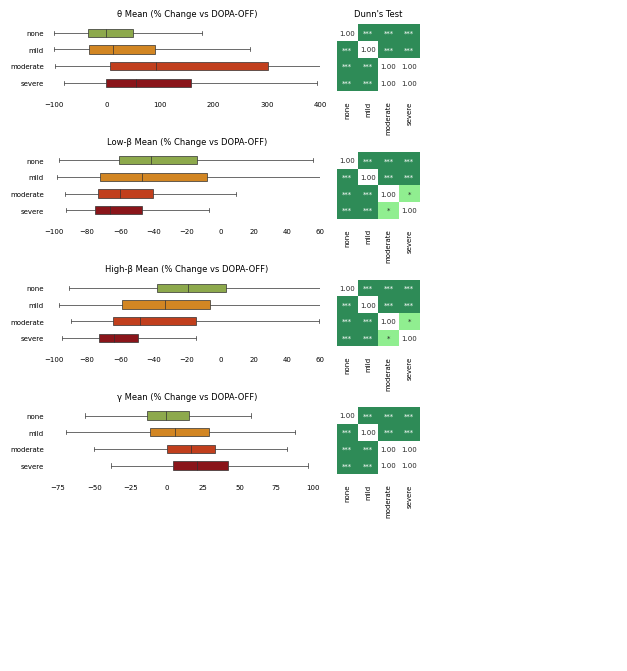

In [68]:
plt   = utils_plotting.get_figure_template()

ax_11 = plt.subplot2grid((75, 40), (0, 0)  , colspan=19, rowspan=8)
ax_12 = plt.subplot2grid((75, 40), (0, 20) , colspan=6, rowspan=8)
ax_21 = plt.subplot2grid((75, 40), (15, 0) , colspan=19, rowspan=8)
ax_22 = plt.subplot2grid((75, 40), (15, 20) , colspan=6, rowspan=8)
ax_31 = plt.subplot2grid((75, 40), (30, 0) , colspan=19, rowspan=8)
ax_32 = plt.subplot2grid((75, 40), (30, 20) , colspan=6, rowspan=8)
ax_41 = plt.subplot2grid((75, 40), (45, 0) , colspan=19, rowspan=8)
ax_42 = plt.subplot2grid((75, 40), (45, 20) , colspan=6, rowspan=8)


utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="event_theta_mean", feat_y="dyskinesia_arm", axis=ax_11, color_palette=colors, order=order, hue="", hue_order="", orient="h")
ax_11.set_title("θ Mean (% Change vs DOPA-OFF)", fontsize=utils_plotting.LABEL_SIZE_label)
ax_11.set_ylabel("", fontsize=utils_plotting.LABEL_SIZE)
ax_11.set_xlim([-100,400])
ax_12 = utils_plotting.heatmap_significance(dataset=df_stats_results[df_stats_results.feature == "event_theta_mean"], order=order, axis=ax_12)
ax_12.set_title("Dunn's Test", fontsize=utils_plotting.LABEL_SIZE_label)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="event_beta_low_mean", feat_y="dyskinesia_arm", axis=ax_21, color_palette=colors, order=order, hue="", hue_order="", orient="h")
ax_21.set_title("Low-β Mean (% Change vs DOPA-OFF)", fontsize=utils_plotting.LABEL_SIZE_label)
ax_21.set_ylabel("", fontsize=utils_plotting.LABEL_SIZE)
ax_21.set_xlim([-100,60])
ax_22 = utils_plotting.heatmap_significance(dataset=df_stats_results[df_stats_results.feature == "event_beta_low_mean"], order=order, axis=ax_22)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="event_beta_high_mean", feat_y="dyskinesia_arm", axis=ax_31, color_palette=colors, order=order, hue="", hue_order="", orient="h")
ax_31.set_title("High-β Mean (% Change vs DOPA-OFF)", fontsize=utils_plotting.LABEL_SIZE_label)
ax_31.set_ylabel("", fontsize=utils_plotting.LABEL_SIZE)
ax_31.set_xlim([-100,60])
ax_32 = utils_plotting.heatmap_significance(dataset=df_stats_results[df_stats_results.feature == "event_beta_low_mean"], order=order, axis=ax_32)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="event_gamma_mean", feat_y="dyskinesia_arm", axis=ax_41, color_palette=colors, order=order, hue="", hue_order="", orient="h")
ax_41.set_title("γ Mean (% Change vs DOPA-OFF)", fontsize=utils_plotting.LABEL_SIZE_label)
ax_41.set_ylabel("", fontsize=utils_plotting.LABEL_SIZE)
ax_42 = utils_plotting.heatmap_significance(dataset=df_stats_results[df_stats_results.feature == "event_gamma_mean"], order=order, axis=ax_42)

plt.savefig("a.svg", dpi=300)


<Figure size 640x480 with 0 Axes>

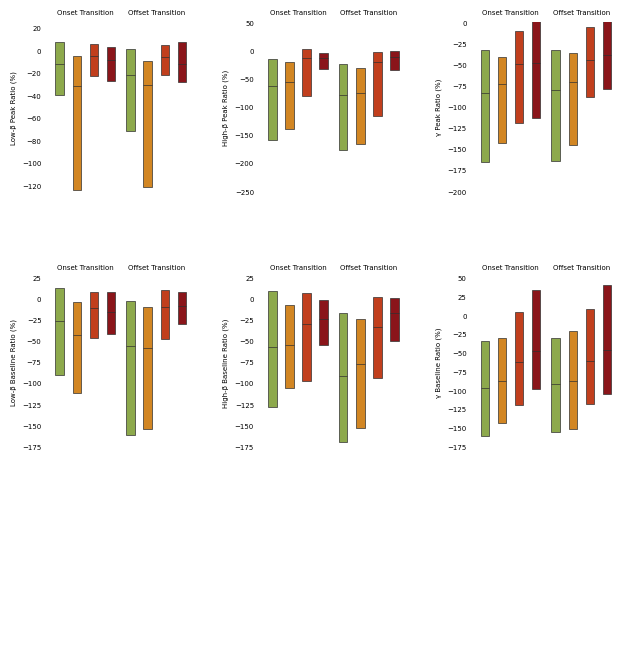

In [66]:
plt    = utils_plotting.get_figure_template()

ax_1   = plt.subplot2grid((75, 40), (0, 0) , colspan=5, rowspan=20)
ax_2   = plt.subplot2grid((75, 40), (0, 5) , colspan=5, rowspan=20)
ax_3   = plt.subplot2grid((75, 40), (0, 15) , colspan=5, rowspan=20)
ax_4   = plt.subplot2grid((75, 40), (0, 20) , colspan=5, rowspan=20)
ax_5   = plt.subplot2grid((75, 40), (0, 30) , colspan=5, rowspan=20)
ax_6   = plt.subplot2grid((75, 40), (0, 35) , colspan=5, rowspan=20)

ax_7   = plt.subplot2grid((75, 40), (30, 0) , colspan=5, rowspan=20)
ax_8   = plt.subplot2grid((75, 40), (30, 5) , colspan=5, rowspan=20)
ax_9   = plt.subplot2grid((75, 40), (30, 15) , colspan=5, rowspan=20)
ax_10  = plt.subplot2grid((75, 40), (30, 20) , colspan=5, rowspan=20)
ax_11  = plt.subplot2grid((75, 40), (30, 30) , colspan=5, rowspan=20)
ax_12  = plt.subplot2grid((75, 40), (30, 35) , colspan=5, rowspan=20)

########################################################################################################################
# PEAK PLOTS ###########################################################################################################
########################################################################################################################
utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="beta_low_peak_onset_ratio", axis=ax_1, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_1.set_ylabel("Low-β Peak Ratio (%)", fontsize=utils_plotting.LABEL_SIZE)
ax_1.set_xticklabels("")
ax_1.set_ylim([-125,25])
ax_1.set_title("Onset Transition", fontsize=utils_plotting.LABEL_SIZE)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="beta_low_peak_offset_ratio", axis=ax_2, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_2.set_ylabel("", fontsize=utils_plotting.LABEL_SIZE)
ax_2.set_xticklabels("")
ax_2.set_yticklabels("")
ax_2.set_ylim([-125,25])
ax_2.set_title("Offset Transition", fontsize=utils_plotting.LABEL_SIZE)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="beta_high_peak_onset_ratio", axis=ax_3, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_3.set_ylabel("High-β Peak Ratio (%)", fontsize=utils_plotting.LABEL_SIZE)
ax_3.set_xticklabels("")
ax_3.set_ylim([-250,50])
ax_3.set_title("Onset Transition", fontsize=utils_plotting.LABEL_SIZE)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="beta_high_peak_offset_ratio", axis=ax_4, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_4.set_ylabel("", fontsize=utils_plotting.LABEL_SIZE)
ax_4.set_xticklabels("")
ax_4.set_yticklabels("")
ax_4.set_ylim([-250,50])
ax_4.set_title("Offset Transition", fontsize=utils_plotting.LABEL_SIZE)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="gamma_peak_onset_ratio", axis=ax_5, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_5.set_ylabel("γ Peak Ratio (%)", fontsize=utils_plotting.LABEL_SIZE)
ax_5.set_xticklabels("")
ax_5.set_ylim([-200,0])
ax_5.set_title("Onset Transition", fontsize=utils_plotting.LABEL_SIZE)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="gamma_peak_offset_ratio", axis=ax_6, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_6.set_ylabel("", fontsize=utils_plotting.LABEL_SIZE)
ax_6.set_xticklabels("")
ax_6.set_yticklabels("")
ax_6.set_ylim([-200,0])
ax_6.set_title("Offset Transition", fontsize=utils_plotting.LABEL_SIZE)

########################################################################################################################
# BASELINE PLOTS #######################################################################################################
########################################################################################################################

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="beta_low_baseline_onset_ratio", axis=ax_7, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_7.set_ylabel("Low-β Baseline Ratio (%)", fontsize=utils_plotting.LABEL_SIZE)
ax_7.set_xticklabels("")
ax_7.set_ylim([-175,25])
ax_7.set_title("Onset Transition", fontsize=utils_plotting.LABEL_SIZE)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="beta_low_baseline_offset_ratio", axis=ax_8, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_8.set_ylabel("", fontsize=utils_plotting.LABEL_SIZE)
ax_8.set_xticklabels("")
ax_8.set_yticklabels("")
ax_8.set_ylim([-175,25])
ax_8.set_title("Offset Transition", fontsize=utils_plotting.LABEL_SIZE)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="beta_high_baseline_onset_ratio", axis=ax_9, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_9.set_ylabel("High-β Baseline Ratio (%)", fontsize=utils_plotting.LABEL_SIZE)
ax_9.set_xticklabels("")
ax_9.set_ylim([-175,25])
ax_9.set_title("Onset Transition", fontsize=utils_plotting.LABEL_SIZE)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="beta_high_baseline_offset_ratio", axis=ax_10, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_10.set_ylabel("", fontsize=utils_plotting.LABEL_SIZE)
ax_10.set_xticklabels("")
ax_10.set_yticklabels("")
ax_10.set_ylim([-175,25])
ax_10.set_title("Offset Transition", fontsize=utils_plotting.LABEL_SIZE)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="gamma_baseline_onset_ratio", axis=ax_11, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_11.set_ylabel("γ Baseline Ratio (%)", fontsize=utils_plotting.LABEL_SIZE)
ax_11.set_xticklabels("")
ax_11.set_ylim([-175,50])
ax_11.set_title("Onset Transition", fontsize=utils_plotting.LABEL_SIZE)

utils_plotting.boxplot(data=PSD_TAPPING_C_MOTOR, feat_x="dyskinesia_arm", feat_y="gamma_baseline_offset_ratio", axis=ax_12, 
                       color_palette=colors, order=order, hue="", hue_order="", orient="v", show_whiskers=False)
ax_12.set_ylabel("", fontsize=utils_plotting.LABEL_SIZE)
ax_12.set_xticklabels("")
ax_12.set_yticklabels("")
ax_12.set_ylim([-175,50])
ax_12.set_title("Offset Transition", fontsize=utils_plotting.LABEL_SIZE)

plt.savefig("b.svg", dpi=300)

In [ ]:
df_stats_results[(df_stats_results.feature == "beta_high_peak_onset_ratio") & (df_stats_results.pvalue <= 0.05)] 